In [68]:
import pandas as pd
import numpy as np

In [55]:
covid_data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
orig_df = pd.read_csv(covid_data)
orig_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22,6/9/22,6/10/22,6/11/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180520,180584,180615,180615,180688,180741,180784,180864,180864,180864
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276221,276310,276342,276401,276415,276468,276518,276583,276638,276690
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265889,265889,265889,265897,265900,265904,265909,265920,265925,265925
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,43067,43067,43067,43067,43067,43224,43224,43224,43224
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [56]:
orig_df.info()
print("\n")
orig_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 876 entries, Province/State to 6/11/22
dtypes: float64(2), int64(872), object(2)
memory usage: 1.9+ MB




Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/2/22', '6/3/22', '6/4/22', '6/5/22', '6/6/22', '6/7/22', '6/8/22',
       '6/9/22', '6/10/22', '6/11/22'],
      dtype='object', length=876)

In [57]:
df = orig_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="Date", value_name="Confirmed")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [58]:
# Checking province/state column
df[df["Province/State"] != np.nan]
df.iloc[0]["Province/State"] == "NaN"
print(df.isnull().sum())
print("\n")
df.dropna().head()

Province/State    170912
Country/Region         0
Lat                 1744
Long                1744
Date                   0
Confirmed              0
dtype: int64




,Province/State,Country/Region,Lat,Long,Date,Confirmed
9,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0
10,New South Wales,Australia,-33.8688,151.2093,1/22/20,0
11,Northern Territory,Australia,-12.4634,130.8456,1/22/20,0
12,Queensland,Australia,-27.4698,153.0251,1/22/20,0
13,South Australia,Australia,-34.9285,138.6007,1/22/20,0


In [59]:
df = df.drop(['Province/State','Lat','Long'],axis=1)
df

,Country/Region,Date,Confirmed
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
248515,West Bank and Gaza,6/11/22,657879
248516,Winter Olympics 2022,6/11/22,535
248517,Yemen,6/11/22,11822
248518,Zambia,6/11/22,323058


In [64]:
df = df.groupby(['Country/Region','Date']).sum()
df_cleaned = df.reset_index()
df_cleaned

,Country/Region,Date,Confirmed
0,Afghanistan,1/1/21,52513
1,Afghanistan,1/1/22,158107
2,Afghanistan,1/10/21,53489
3,Afghanistan,1/10/22,158394
4,Afghanistan,1/11/21,53538
...,...,...,...
173523,Zimbabwe,9/7/21,125796
173524,Zimbabwe,9/8/20,7388
173525,Zimbabwe,9/8/21,125931
173526,Zimbabwe,9/9/20,7429


In [71]:
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [79]:
our_countries = df_cleaned["Country/Region"].unique()
their_countries = world.name.unique()

match = []
for i in our_countries:
  if i in their_countries:
    match.append(i)

our_mismatch = []
their_mismatch = []
for i in our_countries:
  if i not in match:
    our_mismatch.append(i)

for i in their_countries:
  if i not in match:
    their_mismatch.append(i)

our_mismatch.sort()
their_mismatch.sort()
print(our_mismatch)
print("\n")
print(their_mismatch)

['Andorra', 'Antigua and Barbuda', 'Bahrain', 'Barbados', 'Bosnia and Herzegovina', 'Burma', 'Cabo Verde', 'Central African Republic', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', "Cote d'Ivoire", 'Diamond Princess', 'Dominica', 'Dominican Republic', 'Equatorial Guinea', 'Eswatini', 'Grenada', 'Holy See', 'Kiribati', 'Korea, North', 'Korea, South', 'Liechtenstein', 'MS Zaandam', 'Maldives', 'Malta', 'Marshall Islands', 'Mauritius', 'Micronesia', 'Monaco', 'North Macedonia', 'Palau', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Seychelles', 'Singapore', 'Solomon Islands', 'South Sudan', 'Summer Olympics 2020', 'Taiwan*', 'Tonga', 'US', 'West Bank and Gaza', 'Winter Olympics 2022']


['Bosnia and Herz.', 'Central African Rep.', 'Congo', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Dominican Rep.', 'Eq. Guinea', 'Falkland Is.', 'Fr. S. Antarctic Lands', 'Greenland', 'Macedonia', 'Myanmar', 'N. Cyprus', 'New C

In [88]:
country_map = {'Bosnia and Herzegovina':'Bosnia and Herz.', 
               'Central African Republic':'Central African Rep.',
               'Congo (Brazzaville)':'Congo',
               "Cote d'Ivoire":"Côte d'Ivoire",
               'Congo (Kinshasa)': 'Dem. Rep. Congo',
               'Dominican Republic':'Dominican Rep.',
               'Equatorial Guinea':'Eq. Guinea',
               'Korea, North': 'North Korea',
               'Korea, South': 'South Korea',
               'Eswatini':'eSwatini',
               'South Sudan':'S. Sudan',
               'Taiwan*':'Taiwan',
               'US':'United States of America',
               'Western Sahara':'W. Sahara'}

df_cleaned['Country'] = df_cleaned['Country/Region'].map(country_map)
df_cleaned.loc[~df_cleaned['Country'].notnull(), 'Country'] = df_cleaned.loc[~df_cleaned['Country'].notnull(), 'Country/Region']
cdf = df_cleaned
cdf

,Country/Region,Date,Confirmed,Country
0,Afghanistan,1/1/21,52513,Afghanistan
1,Afghanistan,1/1/22,158107,Afghanistan
2,Afghanistan,1/10/21,53489,Afghanistan
3,Afghanistan,1/10/22,158394,Afghanistan
4,Afghanistan,1/11/21,53538,Afghanistan
...,...,...,...,...
173523,Zimbabwe,9/7/21,125796,Zimbabwe
173524,Zimbabwe,9/8/20,7388,Zimbabwe
173525,Zimbabwe,9/8/21,125931,Zimbabwe
173526,Zimbabwe,9/9/20,7429,Zimbabwe


In [94]:
# Check one day
cdf20 = cdf[cdf['Date']=='6/20/20']
cworld = world.merge(cdf20,how= 'left',left_on='name',right_on='Country')
cworld.Confirmed = cworld.Confirmed.fillna(0)
cworld

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country/Region,Date,Confirmed,Country
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,6/20/20,18.0,Fiji
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,6/20/20,509.0,Tanzania
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,0.0,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,6/20/20,101341.0,Canada
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",US,6/20/20,2251332.0,United States of America
...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,6/20/20,12803.0,Serbia
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,6/20/20,359.0,Montenegro
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",Kosovo,6/20/20,1998.0,Kosovo
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,6/20/20,123.0,Trinidad and Tobago


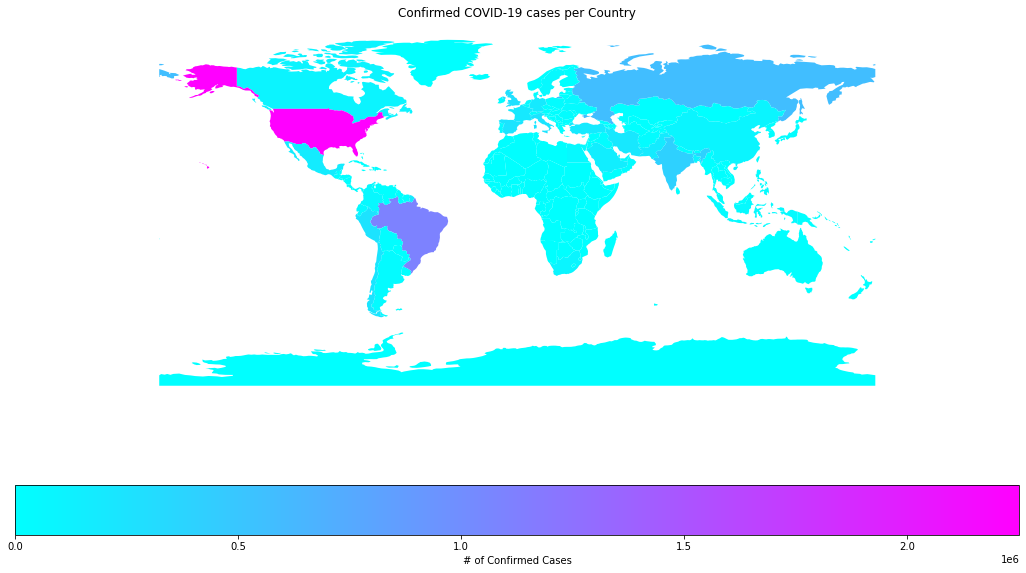

In [100]:
import matplotlib.pyplot as plt

# Plot the one day
columnfig = cworld.plot(column='Confirmed',cmap='cool',figsize=(18,10), legend = True, legend_kwds={'label': "# of Confirmed Cases", 'orientation': "horizontal"})
# Remove axis ticks
plt.axis('off')
plt.title("Confirmed COVID-19 cases per Country")
plt.show()

In [108]:
mergedworld = pd.DataFrame()
dates = cdf.Date.unique()
for i in dates:
    mergetemp = world.merge(cdf[cdf.Date==i], left_on='name', right_on='Country',how='left')
    mergetemp.Confirmed.fillna(0)
    mergedworld = mergedworld.append(mergetemp)

mergedworld.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country/Region,Date,Confirmed,Country
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,1/1/21,49.0,Fiji
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,1/1/21,509.0,Tanzania
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,1/1/21,596582.0,Canada
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",US,1/1/21,20370218.0,United States of America


In [115]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

def worldplot(date):
    mergedworld[mergedworld.Date==date[0]].plot(column='Confirmed',figsize=(20,9), legend = True)

index = (0, len(dates)-1)
selection_range_slider = widgets.SelectionRangeSlider(
    options=dates,
    index=index,
    description='Date',
    layout={'width': '500px'}
)

interact(worldplot, date=selection_range_slider)

interactive(children=(SelectionRangeSlider(description='Date', index=(0, 871), layout=Layout(width='500px'), o…

<function __main__.worldplot>